In [1]:
'''
TODO:
    Train the review data with review for the given product category, remove those in other irrelevant categories
    Prioritize reviews by date (early has higher chance in training set)

'''

%matplotlib inline

In [2]:
import json

def load_file(file_path):
    """

    :param file_path: path to the json file
    :return: an array in which each entry is tuple [text, classification label]
    """
    with open(file_path) as json_file:
        raw_data = json.load(json_file)
        return convert_data(raw_data)


def convert_data(raw_data):
    data = []
    for elem in raw_data:
        data.append([elem["reviewerID"], elem["asin"], elem["helpful"], elem["reviewText"], elem["overall"], elem["summary"], elem["unixReviewTime"], elem["reviewTime"]])
    return data

In [3]:
import pandas as pd
data = load_file("ElectronicsReviews1.json")

df = pd.DataFrame(data, columns = ['reviewerID', 'asin', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2NYK9KWFMJV4Y,B00KIMX4EY,"[0, 0]",I received my transmitted as a review sample f...,5.0,Easy installation and superb performance,1402012800,"06 6, 2014"
1,A1LAGBKLFBEVXL,B00KIMX4EY,"[1, 1]","I have a 3.5mm auxillary jack in my car, but i...",5.0,Excellent device with good audio quality,1402358400,"06 10, 2014"
2,A240FRPD4MEXND,B00KIMX4EY,"[0, 0]",I do not pretend to understand just how this a...,5.0,An Amazing Transmitter,1406073600,"07 23, 2014"
3,A1ZRHBODI7I015,B00KIMX4EY,"[0, 0]",Great product that saved me hundreds of dollar...,5.0,A Wallet-Saver,1405123200,"07 12, 2014"
4,A8NIGRJORA9KT,B00KIMX4EY,"[1, 2]",Went on a Road Trip back east.Drove back used ...,1.0,Broke one week after i recived it,1403136000,"06 19, 2014"


5

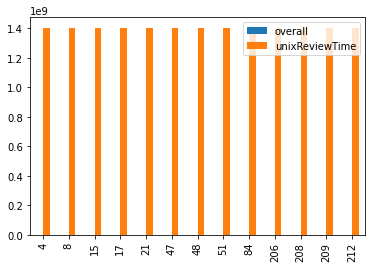

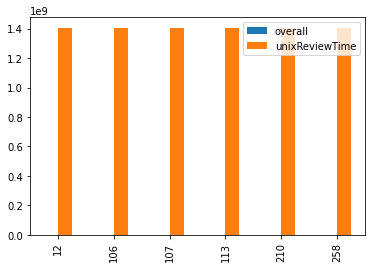

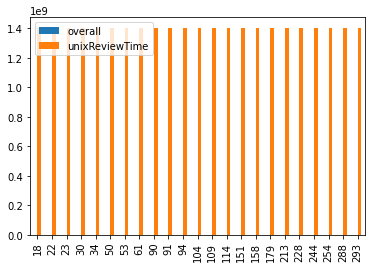

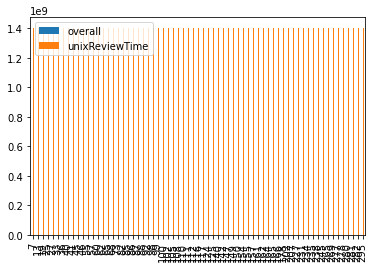

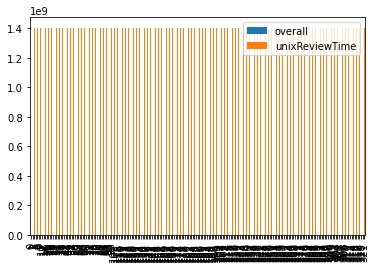

In [4]:
# Graph 'overall' rating (x-axis) and its number of counts (y-axis).
df.groupby('overall').plot(kind='bar').nunique()

In [ ]:
# # TODO: train - test split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], 
#                                                     df['summary'],
#                                                     test_size=0.20, 
#                                                     random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [5]:
import spacy
from negspacy.negation import Negex

nlp = spacy.load("en_core_web_sm")
negex = Negex(nlp, ent_types=["PERSON","ORG"])
nlp.add_pipe(negex, last=True)

doc = nlp("She does not like Steve Jobs but likes Apple products.")
for e in doc.ents:
    print(e.text, e._.negex)

ModuleNotFoundError: ignored

In [6]:
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import spacy
from num_fh import NFH
nlp = spacy.load('en_core_web_sm')
nfh = NFH(nlp)
nlp.add_pipe(nfh, first=False)
doc = nlp("I told you two, that only one of them is the one who will get 2 or 3 icecreams")

assert doc[16]._.is_nfh == True
assert doc[18]._.is_nfh == False
assert doc[3]._.is_deter_nfh == True
assert doc[16]._.is_deter_nfh == False
assert len(doc._.nfh) == 4

ModuleNotFoundError: ignored

In [ ]:
import spacy
from spaczz.pipeline import SpaczzRuler

nlp = spacy.blank('en')
ruler = SpaczzRuler(nlp)
ruler.add_patterns([{'label': 'PERSON', 'pattern': 'Bill Gates', 'type': 'fuzzy'}])
nlp.add_pipe(ruler)

doc = nlp('Oops, I spelled Bill Gatez wrong.')
print([(ent.text, ent.start, ent.end, ent.label_) for ent in doc.ents])

In [ ]:
import spacy
from spacy_lookup import Entity

nlp = spacy.load('en_core_web_sm')
entity = Entity(keywords_list=['python', 'java platform'])
nlp.add_pipe(entity, last=True)

doc = nlp("I am a product manager for a java and python.")
assert doc._.has_entities == True
assert doc[2:5]._.has_entities == True
assert doc[0]._.is_entity == False
assert doc[3]._.is_entity == True
print(doc._.entities)

In [ ]:
import sys
import spacy
import wmd

nlp = spacy.load('en_core_web_sm', create_pipeline=wmd.WMD.create_spacy_pipeline)
doc1 = nlp("Politician speaks to the media in Illinois.")
doc2 = nlp("The president greets the press in Chicago.")
print(doc1.similarity(doc2))

In [ ]:
import sys
import spacy
from spacymoji import Emoji

nlp = spacy.load('en_core_web_sm')
emoji = Emoji(nlp)
nlp.add_pipe(emoji, first=True)

doc = nlp('This is a test 😻 👍🏿')
assert doc._.has_emoji == True
assert doc[2:5]._.has_emoji == True
assert doc[0]._.is_emoji == False
assert doc[4]._.is_emoji == True
assert doc[5]._.emoji_desc == 'thumbs up dark skin tone'
assert len(doc._.emoji) == 2
assert doc._.emoji[1] == ('👍🏿', 5, 'thumbs up dark skin tone')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("This is text")
texts = ["This is a text","These are lot of texts","..."]
docs = list(nlp.pipe(texts))

In [ ]:
texts = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]

nlp = spacy.load("en_core_web_sm")
for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents])

In [ ]:
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger

nlp = spacy.load('fr')
pos = POSTagger()
french_lemmatizer = LefffLemmatizer(after_melt=True)
nlp.add_pipe(pos, name='pos', after='parser')
nlp.add_pipe(french_lemmatizer, name='lefff', after='pos')
doc = nlp(u"Paris est une ville très chère.")
for d in doc:
    print(d.text, d.pos_, d._.melt_tagger, d._.lefff_lemma, d.tag_, d.lemma_)

In [ ]:
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

nlp = en_core_web_sm.load()

# Remove stopwords from the text
import string
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
print(punctuations)
print(stopwords)

In [ ]:
line = nlp(df.loc[3]['reviewText'])
spacy.displacy.render(line, style='ent',jupyter=True)
for entity in line.ents:
    print(entity.text, entity.label_)
print("Noun phrases:", [chunk.text for chunk in line.noun_chunks])
print("Verbs:", [token.lemma_ for token in line if token.pos_ == "VERB"])

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
lang = "en"
pipeline = ["tagger", "parser", "ner"]
data_path = "path/to/en_core_web_sm/en_core_web_sm-2.0.0"

cls = spacy.util.get_lang_class(lang)   # 1. Get Language instance, e.g. English()
nlp = cls()                             # 2. Initialize it
for name in pipeline:
    component = nlp.create_pipe(name)   # 3. Create the pipeline components
    nlp.add_pipe(component)             # 4. Add the component to the pipeline
nlp.from_disk(model_data_path)          # 5. Load in the binary data

In [ ]:
import spacy
import torch
import numpy
#import en_trf_bertbaseuncased_lg
import en_trf_xlnetbasecased_lg
from numpy.testing import assert_almost_equal
from tqdm import tqdm as tqdm

    
#nlp = spacy.load("en_trf_bertbaseuncased_lg")
#nlp = en_trf_bertbaseuncased_lg.load()
nlp = en_trf_xlnetbasecased_lg.load()
# doc = nlp("Here is some text to encode.")
# assert doc.tensor.shape == (7, 768)  # Always has one row per token
# doc._.trf_word_pieces_  # String values of the wordpieces
# doc._.trf_word_pieces  # Wordpiece IDs (note: *not* spaCy's hash values!)
# doc._.trf_alignment  # Alignment between spaCy tokens and wordpieces
# # The raw transformer output has one row per wordpiece.
# assert len(doc._.trf_last_hidden_state) == len(doc._.trf_word_pieces)
# # To avoid losing information, we calculate the doc.tensor attribute such that
# # the sum-pooled vectors match (apart from numeric error)
# assert_almost_equal(doc.tensor.sum(axis=0), doc._.trf_last_hidden_state.sum(axis=0), decimal=5)
# span = doc[2:4]
# # Access the tensor from Span elements (especially helpful for sentences)
# assert numpy.array_equal(span.tensor, doc.tensor[2:4])
# # .vector and .similarity use the transformer outputs
# apple1 = nlp("Apple shares rose on the news.")
# apple2 = nlp("Apple sold fewer iPhones this quarter.")
# apple3 = nlp("Apple pie is delicious.")
# print(apple1[0].similarity(apple2[0]))  # 0.73428553
# print(apple1[0].similarity(apple3[0]))  # 0.43365782

In [ ]:
import spacy
from spacy.util import minibatch
import random
import torch

is_using_gpu = spacy.prefer_gpu()
if is_using_gpu:
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

nlp = spacy.load("en_trf_bertbaseuncased_lg")
print(nlp.pipe_names) # ["sentencizer", "trf_wordpiecer", "trf_tok2vec"]
textcat = nlp.create_pipe("trf_textcat", config={"exclusive_classes": True})
for label in ("POSITIVE", "NEGATIVE"):
    textcat.add_label(label)
nlp.add_pipe(textcat)

optimizer = nlp.resume_training()
for i in range(10):
    random.shuffle(TRAIN_DATA)
    losses = {}
    for batch in minibatch(TRAIN_DATA, size=8):
        texts, cats = zip(*batch)
        nlp.update(texts, cats, sgd=optimizer, losses=losses)
    print(i, losses)
nlp.to_disk("/bert-textcat")

In [ ]:
review = str(" ".join([i.lemma_ for i in line]))

line = nlp(review)
spacy.displacy.render(line, style='ent',jupyter=True)

In [ ]:
# Parser for reviews
from spacy.lang.en import English
parser = English()
def spacy_tokenizer(sentence):
    # Tokenize Sentence
    mytokens = parser(sentence)
    # Make words lowercase and remove pronouns
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Remove stopwords and punctuations from the text
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    # Return tokens back into sentence
    mytokens = " ".join([i for i in mytokens])
    return mytokens

df["reviewText_processed"] = df["reviewText"].apply(spacy_tokenizer) 
df.head()

In [ ]:
# Topic Modeling - Latent Dirichlet Allocation (LDA)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [ ]:
NUM_TOPICS = 10

# Creating a vectorizer
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df["reviewText_processed"])

In [ ]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Keywords for topics clustered by Latent Dirichlet Allocation
print("\nLDA Model:")
selected_topics(lda, vectorizer)

In [ ]:
# # Non-Negative Matrix Factorization Model
# nmf = NMF(n_components=NUM_TOPICS)
# data_nmf = nmf.fit_transform(data_vectorized) 

# # Keywords for topics clustered by Non-Negative Matrix Factorization Model
# print("NMF Model:")
# selected_topics(nmf, vectorizer)

In [ ]:
# # Latent Semantic Indexing Model using Truncated SVD
# lsi = TruncatedSVD(n_components=NUM_TOPICS)
# data_lsi = lsi.fit_transform(data_vectorized)

# # Keywords for topics clustered by Latent Semantic Indexing
# print("LSI Model:")
# selected_topics(lsi, vectorizer)

In [ ]:
# Visualizing LDA results with pyLDAvis
# import pyLDAvis.sklearn

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
# dash

In [ ]:
def spacy_bigram_tokenizer(phrase):
    doc = parser(phrase) # create spacy object
    token_not_noun = []
    notnoun_noun_list = []
    noun = ""

    for item in doc:
        if item.pos_ != "NOUN": # separate nouns and not nouns
            token_not_noun.append(item.text)
        if item.pos_ == "NOUN":
            noun = item.text
        
        for notnoun in token_not_noun:
            notnoun_noun_list.append(notnoun + " " + noun)

    return " ".join([i for i in notnoun_noun_list])

In [ ]:
bivectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, ngram_range=(1,2))
bigram_vectorized = bivectorizer.fit_transform(df["reviewText_processed"])

In [ ]:
bi_lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_bi_lda = bi_lda.fit_transform(bigram_vectorized)

In [ ]:
print("Bi-LDA Model:")
selected_topics(bi_lda, bivectorizer)

In [ ]:
# Visualizing LDA results with pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
bi_dash = pyLDAvis.sklearn.prepare(bi_lda, bigram_vectorized, bivectorizer, mds='tsne')
bi_dash

In [ ]:
'''

Here we have the NUM_TOPICS categories that we should have

We'll take the first item (highest score) to represent that category
    In reality, we should trigger changes for manual entry as a category to 
    prevent incorrect categorization, misspellings, and double-representations

'''
topics = []
for idx, topic in enumerate(bi_lda.components_):
    primary_features = [(bivectorizer.get_feature_names()[i], topic[i])
                   for i in topic.argsort() [:-1 - 1:-1] ] # Get the index in the topic list of the best topics
    topics.append(primary_features[0][0])
print(topics)

In [ ]:
# Transforming an individual sentence
import numpy as np
def analyze_for_topic(text):
    text = spacy_tokenizer(text)
    x = bi_lda.transform(bivectorizer.transform([text]))[0]
    return topics[np.argmax(x)]
    
df["topic"] = df["reviewText_processed"].apply(analyze_for_topic) 
df.head()

In [ ]:
# remove the intermediate columns

list_columns = ["reviewText", "reviewText_processed", "topic"]
df = df[list_columns]

df.sort_values(by=['topic'])

In [ ]:
print("Topic: camera\n")
tmp = [text for text in df.query('topic == "camera"')["reviewText"]]
print(*tmp, sep = "\n\n") 